# Time Series Homework Assignment 1
## Sam LaFell, Institute for Advanced Analytics

In [38]:
# Import packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)
import os
os.chdir('/Users/samlafell/Desktop/MSA/Time Series/Data/Homework')

In [26]:
# Import the Data
raleigh = pd.read_csv('PM_2_5_Raleigh2.csv')

In [27]:
# View the top of the data
raleigh.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,1/1/2014,AQS,371830014,3,18.6,ug/m3 LC,65,Millbrook School,1,100,88101,PM2.5 - Local Conditions,37,North Carolina,183,Wake,35.856111,-78.574167
1,1/2/2014,AQS,371830014,3,13.9,ug/m3 LC,55,Millbrook School,1,100,88101,PM2.5 - Local Conditions,37,North Carolina,183,Wake,35.856111,-78.574167
2,1/3/2014,AQS,371830014,3,8.2,ug/m3 LC,34,Millbrook School,1,100,88101,PM2.5 - Local Conditions,37,North Carolina,183,Wake,35.856111,-78.574167
3,1/4/2014,AQS,371830014,3,11.9,ug/m3 LC,50,Millbrook School,1,100,88101,PM2.5 - Local Conditions,37,North Carolina,183,Wake,35.856111,-78.574167
4,1/5/2014,AQS,371830014,3,11.3,ug/m3 LC,47,Millbrook School,1,100,88101,PM2.5 - Local Conditions,37,North Carolina,183,Wake,35.856111,-78.574167


## Using the variable Daily Mean PM2.5 Concentration find out how many missing daily values there are from January 1, 2014 to December 31, 2018.

In [28]:
# Initialize a DataFrame that contains all the days from Jan 1 to Dec 31
# We can compare this date range to our dataset and see which values are missing
dates = pd.DataFrame(pd.date_range(start='01/01/2014', end='12/31/2018'), columns=['Date'])

In [29]:
# We want to merge the two datasets together to see where we are going to ahve missing values
# We will do this through merging ALL rows of the dates DataFrame with the matching
# rows in the Raleigh DataFrame. We will end up with n rows that have NaNs because
# they weren't in our initial dataset. This will show us the total missing days.
raleigh['Date'] = pd.to_datetime(raleigh['Date'])
merge1 = dates
merge2 = raleigh

In [30]:
# Run the merge
merged = pd.merge(merge1, merge2, on='Date', how='left')

In [31]:
# Check out the results
merged

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2014-01-01,AQS,371830014.0,3.0,18.6,ug/m3 LC,65.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
1,2014-01-02,AQS,371830014.0,3.0,13.9,ug/m3 LC,55.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
2,2014-01-03,AQS,371830014.0,3.0,8.2,ug/m3 LC,34.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
3,2014-01-04,AQS,371830014.0,3.0,11.9,ug/m3 LC,50.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
4,2014-01-05,AQS,371830014.0,3.0,11.3,ug/m3 LC,47.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
5,2014-01-06,AQS,371830014.0,3.0,8.2,ug/m3 LC,34.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
6,2014-01-07,AQS,371830014.0,3.0,10.8,ug/m3 LC,45.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
7,2014-01-08,AQS,371830014.0,3.0,16.3,ug/m3 LC,60.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
8,2014-01-09,AQS,371830014.0,3.0,13.6,ug/m3 LC,54.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167
9,2014-01-10,AQS,371830014.0,3.0,12.2,ug/m3 LC,51.0,Millbrook School,1.0,100.0,88101.0,PM2.5 - Local Conditions,37.0,North Carolina,183.0,Wake,35.856111,-78.574167


In [33]:
# This bit of code will show us how many missing days we have across 4 years
# Just counts how many rows have null values
merged.isnull().sum()

Date                                0
Source                            353
Site ID                           353
POC                               353
Daily Mean PM2.5 Concentration    353
UNITS                             353
DAILY_AQI_VALUE                   353
Site Name                         353
DAILY_OBS_COUNT                   353
PERCENT_COMPLETE                  353
AQS_PARAMETER_CODE                353
AQS_PARAMETER_DESC                353
STATE_CODE                        353
STATE                             353
COUNTY_CODE                       353
COUNTY                            353
SITE_LATITUDE                     353
SITE_LONGITUDE                    353
dtype: int64

## In the aggregated data set, what is the value for the Daily Mean PM2.5 Concentration for March 2015?

In [34]:
# We need to set the index of Raleigh and then resample to monthly values
raleigh.index = raleigh['Date']
raleigh = raleigh['Daily Mean PM2.5 Concentration'].resample('M').mean()

### Now create an STL decomposition plot with frequency = 12.  Describe what you see in the trend component.

In [35]:
raleigh = decompose(raleigh, period=12)

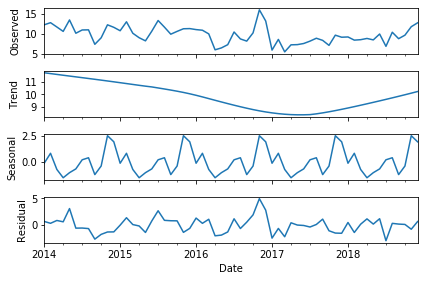

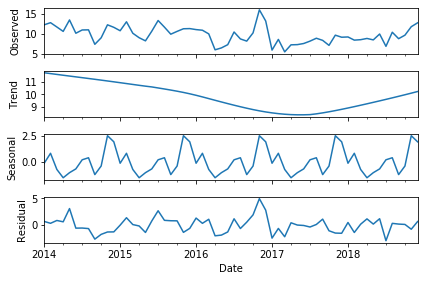

In [36]:
raleigh.plot()